## Imports

In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from attack import *
from my_attack import *
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from image_manager import *

%matplotlib inline

In [36]:
from sklearn import datasets as dt
from sklearn.model_selection import train_test_split


X,y = dt.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [79]:
X_train.shape

(1078, 64)

In [152]:
def draw_result(img, noise, adv_img):
    fig, ax = plt.subplots(1, 3, figsize=(15, 10))
    orig_class, attack_class = get_class(img), get_class(adv_img)
    ax[0].imshow(reverse_trans(img[0]))
    ax[0].set_title('Original image: {}'.format(orig_class.split(',')[0]))
    ax[1].imshow(noise[0].cpu().numpy().transpose(1, 2, 0))
    ax[1].set_title('Attacking noise')
    ax[2].imshow(reverse_trans(adv_img[0]))
    ax[2].set_title('Adversarial example: {}'.format(attack_class))
    for i in range(3):
        ax[i].set_axis_off()
    plt.tight_layout()
    plt.show()

[autoreload of attack failed: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 658, in exec_module
  File "<frozen importlib._bootstrap_external>", line 764, in get_code
  File "<frozen importlib._bootstrap_external>", line 724, in source_to_code
  File 

# Logistic Regression

In [21]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', fit_intercept=False)

In [84]:
attack = Attack(model)
attack.prepare(X_train, y_train, X_test, y_test)

attack.create_one_hot_targets(y_test)

# Lead an attack for every epsilon in range max_epsilon
attack.attack_to_max_epsilon(non_targeted_gradient, 30)
non_targeted_scores = attack.scores

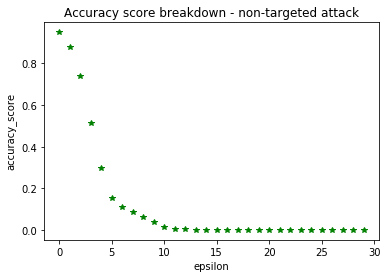

In [42]:
plt.figure()
plt.plot(attack.epsilons, attack.scores, 'g*')
plt.ylabel('accuracy_score')
plt.xlabel('epsilon')
plt.title('Accuracy score breakdown - non-targeted attack')

In [99]:
myattack = CustomAttack(model)
myattack.prepare(X_train, y_train, X_test, y_test)

myattack.create_one_hot_targets(y_test)

# Lead an attack for every epsilon in range max_epsilon
myattack.attack_to_max_epsilon(non_targeted_gradient, 30)
non_targeted_scores = myattack.scores

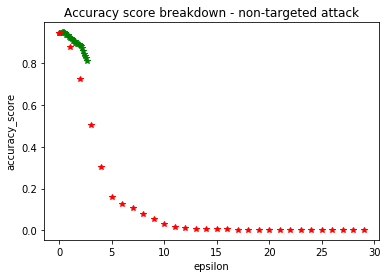

In [94]:
plt.figure()
plt.plot(myattack.epsilons, myattack.scores, 'g*')
plt.plot(attack.epsilons, attack.scores, 'r*')
plt.ylabel('accuracy_score')
plt.xlabel('epsilon')
plt.title('Accuracy score breakdown - non-targeted attack')

Model training finished.
Model testing finished. Initial accuracy score: 0.948539638387


TypeError: Invalid dimensions for image data

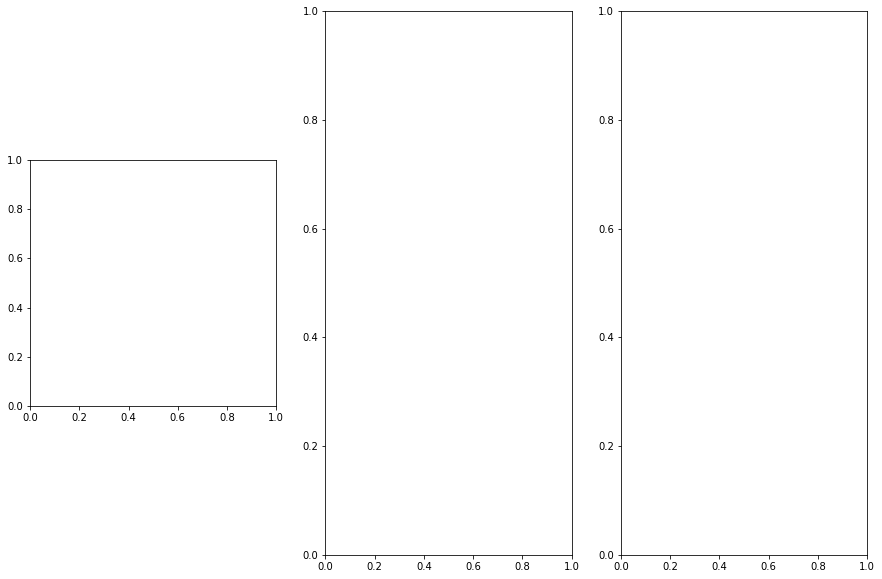

In [159]:
myattack = Attack(model)
myattack.prepare(X_train, y_train, X_test, y_test)
myattack.create_one_hot_targets(y_test)
perturbed_images, perturbed_preds, score = myattack.attack_class(3, non_targeted_gradient, 30)
print("New accuracy on 1 class:", score)

TypeError: Invalid dimensions for image data

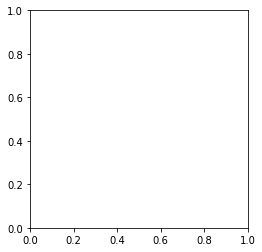

In [166]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(X[0], cmap=plt.cm.gray_r, interpolation='nearest') 
plt.show() 


In [74]:
regularizations = [2 * c for c in range(1, 50)]
accuracy_scores = []
non_targeted_scores = []

for c in regularizations:
    model = LogisticRegression(C=c, multi_class='multinomial', solver='lbfgs', fit_intercept=False)
    attack = Attack(model)
    attack.prepare(X_train, y_train, X_test, y_test)
    attack.create_one_hot_targets(y_test)
    perturbed_images, perturbed_preds, score, highest_epsilon = attack.attack(non_targeted_gradient, 16)
    non_targeted_scores.append(score)
    accuracy_scores.append(attack.initial_score)
    # print("Old vs new accuracy: ", attack.initial_score, score)

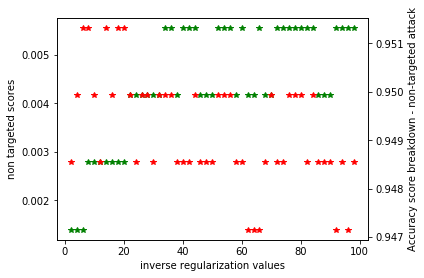

In [75]:
# Accuracy improves with higher regularisation

fig, ax1 = plt.subplots()
ax1.plot(regularizations, non_targeted_scores, 'g*')
ax1.set_xlabel('inverse regularization values')
ax1.set_ylabel('non targeted scores')

ax2 = ax1.twinx()
ax2.plot(regularizations, accuracy_scores, 'r*')
ax2.set_ylabel('Accuracy score breakdown - non-targeted attack')

fig.tight_layout()
plt.show()

# Random Forest